In [25]:
%load_ext autoreload
%autoreload 2

import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sys.path.append('/home/leechh/code/elo/Tools/')
from tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train = pd.read_csv('/home/leechh/data/elo/train.csv')
test = pd.read_csv('/home/leechh/data/elo/test.csv')

# Basic describe

In [3]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [5]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


# Target

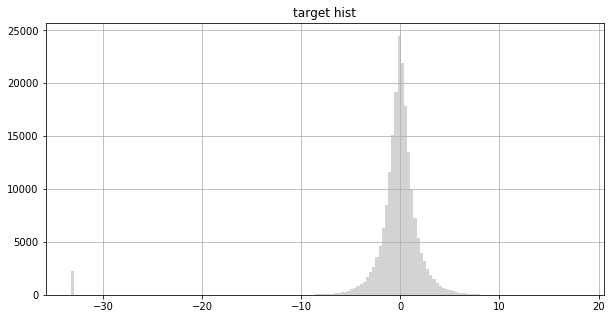

In [39]:
plt.figure(figsize=[10,5])
train.target.hist(bins=160, color='lightgray')
plt.title('target hist')
plt.show()

# Time

In [7]:
train['first_active_month'] = pd.to_datetime(train['first_active_month']).apply()
test['first_active_month'] = pd.to_datetime(test['first_active_month'])

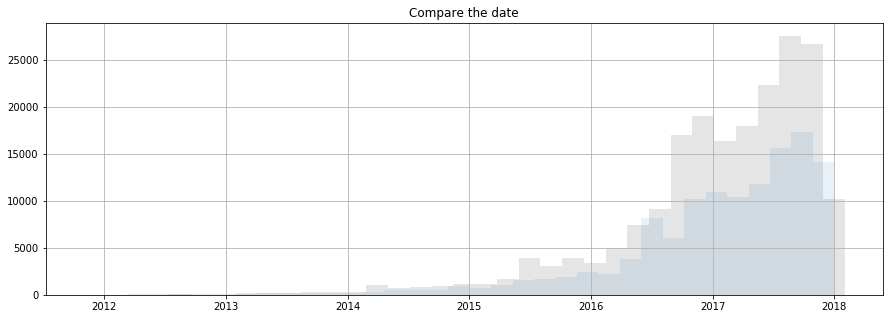

In [29]:
plt.figure(figsize=[15,5])
plt.title('Compare the date')
plt.plot()
train.first_active_month.hist(bins=35, alpha=0.1, color='k')
test.first_active_month.hist(bins=35,alpha=0.1)
plt.show()

我们可以看到，基本上，train与test处于几乎相同的时间内，只是train 数据集多了一个2018-02月时间    
下面，我们来看看，三个feature如何影响最终结果

# Feature_1 to Feature_3

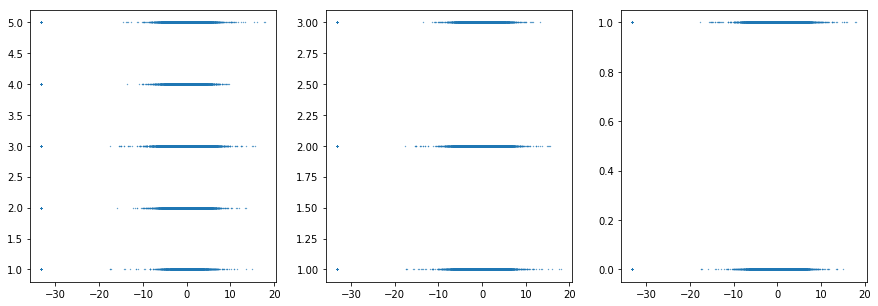

In [32]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(train.target, train.feature_1, s=0.1)
plt.subplot(1,3,2)
plt.scatter(train.target, train.feature_2, s=0.1)
plt.subplot(1,3,3)
plt.scatter(train.target, train.feature_3, s=0.1)
plt.show()